<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/Filter_Grain_abril_26_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd


In [ ]:
from skimage.measure import label, regionprops, regionprops_table

In [ ]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/MarquesGabi_Routines


In [ ]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

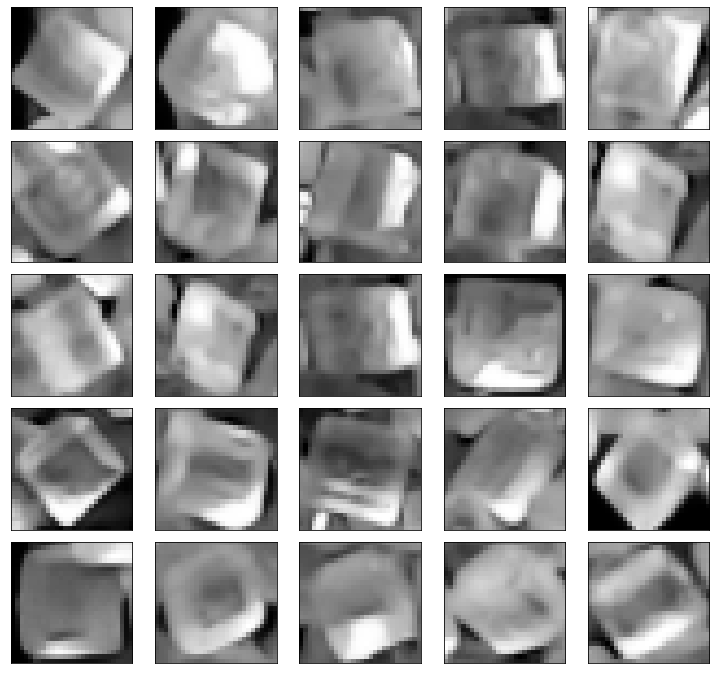

In [ ]:
Num = 25
Size=28
Picture_Size = 25
fig = plt.gcf()
fig.set_size_inches(Picture_Size, Picture_Size)
for i in range(Num):
  data=np.array(df.iloc[i,:]).reshape(Size,Size)
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)

  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  Foto=np.array(img28).reshape(28,28)
  plt.subplot(25,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(Foto, cmap = "gray")
  #plt.xlabel(i)

plt.subplots_adjust(bottom=0.15,left=0.4, right=0.8, top=2,hspace=0.1, wspace=0.01)

In [ ]:
Size = 28
image = np.array(df.iloc[2,:]).reshape(Size,Size)
media =np.mean(image)

for i in range(Size):
  for j in range(Size):
    if(image[i,j]>media):
      image[i,j] = 0
    else:
      image[i,j] = 255
''''''
label_img = label(image)
regions = regionprops(label_img)

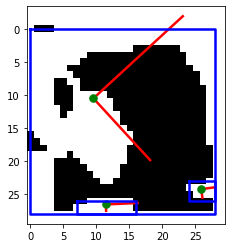

In [ ]:
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)

for props in regions:
    y0, x0 = props.centroid
    orientation = props.orientation
    x1 = x0 + np.cos(orientation) * 0.5 * props.minor_axis_length
    y1 = y0 - np.sin(orientation) * 0.5 * props.minor_axis_length
    x2 = x0 - np.sin(orientation) * 0.5 * props.major_axis_length
    y2 = y0 - np.cos(orientation) * 0.5 * props.major_axis_length

    ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
    ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
    ax.plot(x0, y0, '.g', markersize=15)

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)

#ax.axis((0, 600, 600, 0))
plt.show()

In [ ]:
Size = 28
image = np.array(df.iloc[2,:]).reshape(Size,Size)
#median = cv2.medianBlur(image,28)
# label_img = label(mediam)
#regions = regionprops(label_img)

blur = cv2.blur(image,(5,5))
label_img = label(blur)
regions = regionprops(label_img)

In [ ]:
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html

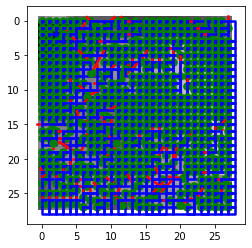

In [ ]:
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)

for props in regions:
    y0, x0 = props.centroid
    orientation = props.orientation
    x1 = x0 + np.cos(orientation) * 0.5 * props.minor_axis_length
    y1 = y0 - np.sin(orientation) * 0.5 * props.minor_axis_length
    x2 = x0 - np.sin(orientation) * 0.5 * props.major_axis_length
    y2 = y0 - np.cos(orientation) * 0.5 * props.major_axis_length

    ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
    ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
    ax.plot(x0, y0, '.g', markersize=15)

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)

#ax.axis((0, 600, 600, 0))
plt.show()

In [ ]:
# Gaussiano
Size = 28
data = np.array(df.iloc[24,:]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)

blur = cv2.GaussianBlur(img,(5,5),0)
label_img = label(blur)
regions = regionprops(label_img)

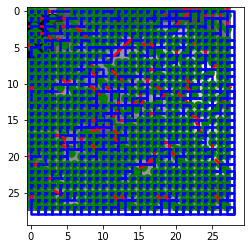

In [ ]:
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)

for props in regions:
    y0, x0 = props.centroid
    orientation = props.orientation
    x1 = x0 + np.cos(orientation) * 0.5 * props.minor_axis_length
    y1 = y0 - np.sin(orientation) * 0.5 * props.minor_axis_length
    x2 = x0 - np.sin(orientation) * 0.5 * props.major_axis_length
    y2 = y0 - np.cos(orientation) * 0.5 * props.major_axis_length

    ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
    ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
    ax.plot(x0, y0, '.g', markersize=15)

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)

#ax.axis((0, 600, 600, 0))
plt.show()

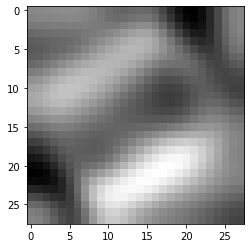

In [ ]:
Size = 28
Size = 28
data = np.array(df.iloc[24,:]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)
blur = cv2.GaussianBlur(img,(9,9),0)
plt.imshow(blur, cmap = "gray")

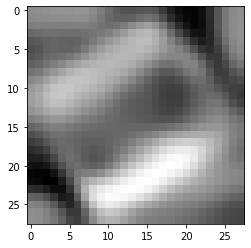

In [ ]:
Size = 28
data = np.array(df.iloc[24,:]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)

blur = cv2.GaussianBlur(img,(5,5),0)
plt.imshow(blur, cmap = "gray")

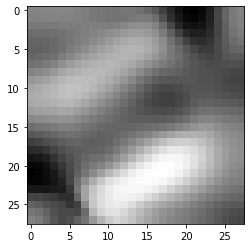

In [ ]:
Size = 28
image = np.array(df.iloc[2,:]).reshape(Size,Size)
#blur = cv2.GaussianBlur(img,(1,1),0)
blur = cv2.bilateralFilter(img,9,75,75)
plt.imshow(blur, cmap = "gray")

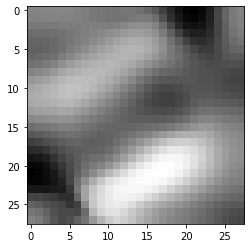

In [ ]:
Size = 28
image = np.array(df.iloc[2,:]).reshape(Size,Size)
blur = cv2.GaussianBlur(img,(1,1),0)
blur = cv2.bilateralFilter(img,9,75,75)
plt.imshow(blur, cmap = "gray")

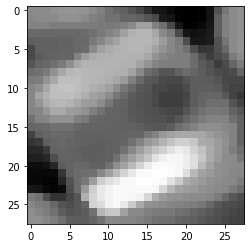

In [ ]:
Size = 28
data = np.array(df.iloc[24,:]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)
blur = cv2.medianBlur(img,5)
plt.imshow(blur, cmap = "gray")

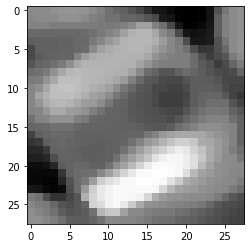

In [ ]:
plt.imshow(blur, cmap = "gray")

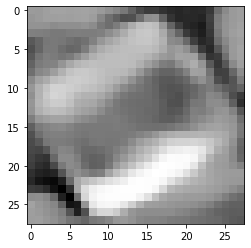

In [ ]:
Size = 28
image = np.array(df.iloc[24,:]).reshape(Size,Size)
plt.imshow(image, cmap = "gray")